In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline


In [56]:
### variable declarations
L = 2
nx = 31
ny = 31
nu = 0.05
nt = 20
CFL = 0.25
dx = L / (nx - 1)
dy = L / (ny - 1)
dt = CFL * dx**2 / nu

# Create computational grid
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
X, Y = np.meshgrid(x, y)

u = np.ones([nx,ny])
u[int(0.5/dx):int(1/dx+1),int(0.5/dy):int(1/dy+1)] = 2 # set values of u =2 between 0.5 and 1



Text(0.5, 0.5, '$y$')

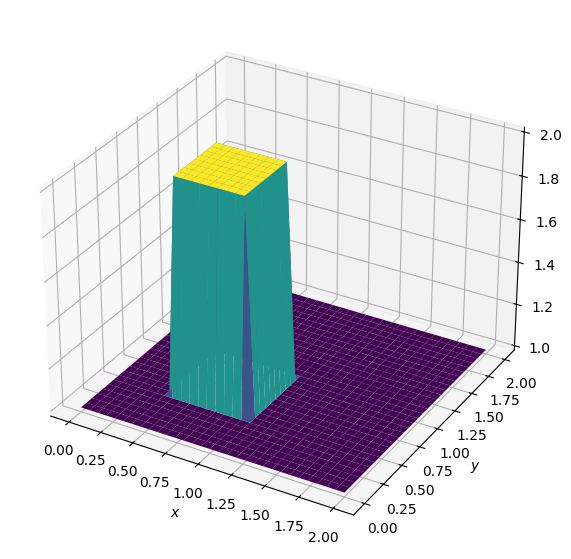

In [57]:
# Create figure and 3D axis
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')  # Correct way to create a 3D plot
X, Y = np.meshgrid(x,y)

# Plot the surface
ax.plot_surface(X, Y, u, cmap=cm.viridis)


# Labels
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

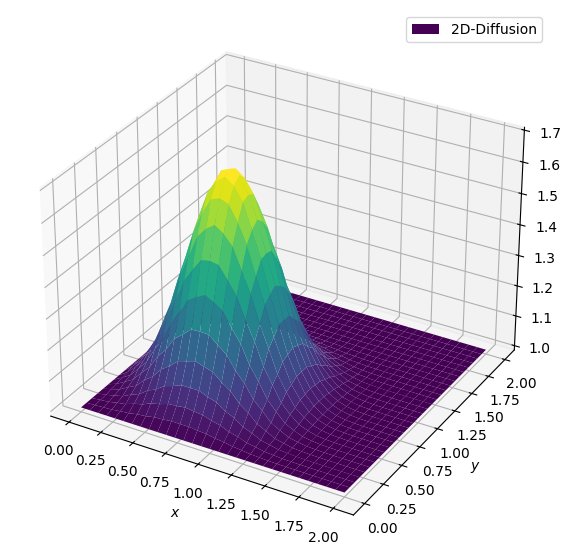

In [58]:
un = np.asarray(u)

 

for n in range(nt+1):
    un = u.copy()

    u[1:-1, 1:-1] = (un[1:-1,1:-1]) + nu*dt/(dx**2)*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1]) + nu*dt/(dy**2)*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,0:-2])


    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

# Create figure and 3D axis
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')  # Correct way to create a 3D plot
X, Y = np.meshgrid(x,y)

# Plot the surface
ax.plot_surface(X, Y, u, cmap=cm.viridis)


# Labels
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')


ax.legend(['2D-Diffusion'], loc='best')


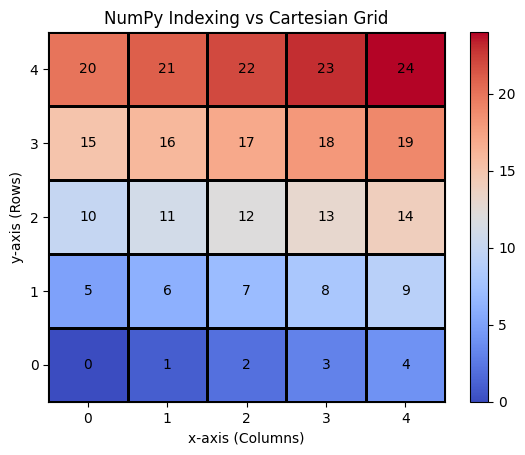

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid size
nx, ny = 5, 5
x = np.linspace(0, 4, nx)
y = np.linspace(0, 4, ny)

# Create meshgrid
X, Y = np.meshgrid(x, y)

# Create a dummy field
u = np.arange(nx * ny).reshape(ny, nx)  # Notice we reshape (ny, nx)

# Plot the matrix values
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, u, cmap="coolwarm", edgecolors="k")

# Annotate values
for i in range(ny):
    for j in range(nx):
        ax.text(X[i, j], Y[i, j], f"{u[i, j]}", ha="center", va="center", color="black")

ax.set_xlabel("x-axis (Columns)")
ax.set_ylabel("y-axis (Rows)")
ax.set_title("NumPy Indexing vs Cartesian Grid")
plt.colorbar(c)
plt.show()
